<a href="https://colab.research.google.com/github/MonishPadala-13/K-Means-Customer-Segmentation/blob/main/customer_segmentation_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Segmentation using K-Means Clustering

This project demonstrates how K-Means clustering can be used
to segment customers based on their features.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs


In [2]:
# Create synthetic customer data
X, _ = make_blobs(
    n_samples=300,
    centers=4,
    cluster_std=1.0,
    random_state=42
)

# Convert to DataFrame
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df.head()


,Feature 1,Feature 2
0,-9.297689,6.473679
1,-9.698741,6.938967
2,-1.686653,7.793442
3,-7.097308,-5.781333
4,-10.876452,6.315437


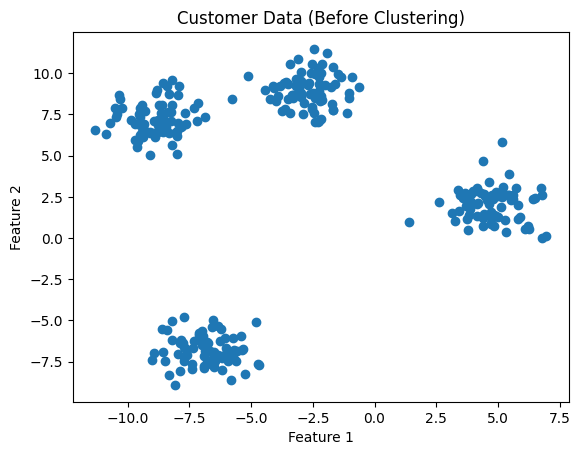

In [3]:
plt.scatter(df["Feature 1"], df["Feature 2"])
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Customer Data (Before Clustering)")
plt.show()


## Elbow Method

The Elbow Method helps determine the optimal number of clusters (K).
We run K-Means for different values of K and calculate the inertia.
The point where the decrease slows down (elbow) is the best K.


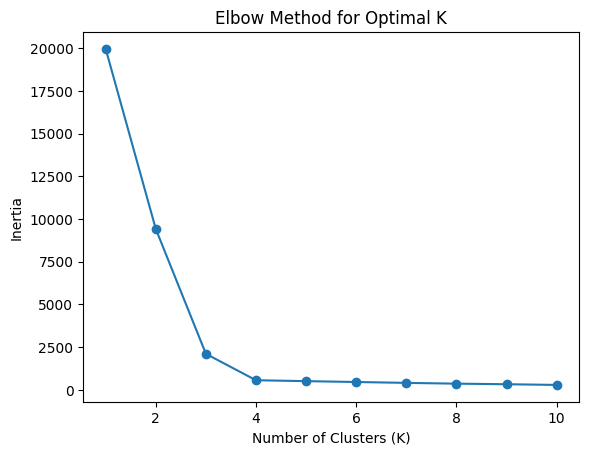

In [4]:
inertia = []

K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(K_range, inertia, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()


## Applying K-Means Clustering

Based on the Elbow Method, we choose K = 4
and apply the K-Means algorithm to segment the customers.


In [5]:
# Apply K-Means with optimal K
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(df)

# Add cluster labels to dataframe
df["Cluster"] = clusters
df.head()


,Feature 1,Feature 2,Cluster
0,-9.297689,6.473679,3
1,-9.698741,6.938967,3
2,-1.686653,7.793442,0
3,-7.097308,-5.781333,1
4,-10.876452,6.315437,3


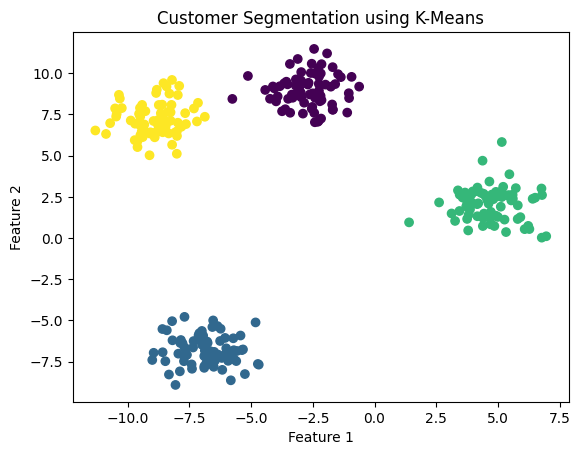

In [6]:
plt.scatter(
    df["Feature 1"],
    df["Feature 2"],
    c=df["Cluster"]
)

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Customer Segmentation using K-Means")
plt.show()


## Interpretation

Each color represents a different customer segment.
Customers within the same cluster have similar characteristics,
while customers in different clusters behave differently.

This information can be used for:
- Targeted marketing
- Personalized recommendations
- Customer behavior analysis


## Conclusion

This project demonstrates how K-Means clustering can be used
for customer segmentation without labeled data.
It highlights the importance of visualization and choosing
the correct number of clusters using the Elbow Method.
